# EDA for Enhanced Molecular Data


## Labeled Data

In [23]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the enhanced molecular data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/tox21/labeled_features.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df_labeled.shape}")
df_labeled.head()

Dataset loaded successfully!
Shape: (5661, 40)


,mol_id,smiles,canonical_smiles,toxic,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,...,HallKierAlpha,NumSaturatedCarbocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen
0,TOX27197,CC(=O)OC1C2(C)CCC(C2)C1(C)C,CC(=O)OC1C2(C)CCC(C2)C1(C)C,0,196.290,2.7643,0.0,2.0,1.0,0.0,...,-0.530000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TOX7184,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...,0,370.775,3.5920,0.0,5.0,0.0,0.0,...,0.884416,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TOX3385,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,0,413.426,2.8818,0.0,8.0,4.0,2.0,...,-3.130000,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,TOX28697,c1ccc2c(c1)Sc1ccccc1N2C[C@@H]1CN2CCC1CC2,c1ccc2c(c1)Sc1ccccc1N2C[C@@H]1CN2CCC1CC2,0,322.477,4.6311,0.0,3.0,2.0,2.0,...,-1.450000,0.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
4,TOX29393,O=C1CCN(c2ccccc2)N1,O=C1CCN(c2ccccc2)N1,0,162.192,0.9279,1.0,2.0,1.0,1.0,...,-1.510000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Step 2: Display and understand each feature
print("="*80)
print("COLUMN NAMES AND DATA TYPES")
print("="*80)
print(df_labeled.dtypes)
print("\n" + "="*80)
print("FEATURE DESCRIPTIONS")
print("="*80)

# Group features by category
molecular_ids = ['smiles', 'canonical_smiles', 'mol_id']
targets = ['toxic']
basic_props = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'TPSA']
lipinski_features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumHeteroatoms']
druglikeness = ['QED', 'TPSA', 'MolMR']
structural = ['NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 
              'NumSaturatedCarbocycles', 'NumAromaticCarbocycles', 
              'NumSaturatedHeterocycles', 'NumAromaticHeterocycles']
topological = ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha']
electronic = ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']
surface = ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2']
pharmacophore = ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen']

print(f"\nMolecular Identifiers: {molecular_ids}")
print(f"Target Variables: {targets}")
print(f"Basic Properties: {basic_props}")
print(f"Lipinski Features: {lipinski_features}")
print(f"Drug-likeness: {druglikeness}")
print(f"Structural: {structural}")
print(f"Topological: {topological}")
print(f"Electronic: {electronic}")
print(f"Surface Area: {surface}")
print(f"Pharmacophore: {pharmacophore}")

COLUMN NAMES AND DATA TYPES
mol_id                       object
smiles                       object
canonical_smiles             object
toxic                         int64
MolWt                       float64
LogP                        float64
NumHDonors                  float64
NumHAcceptors               float64
NumRotatableBonds           float64
NumAromaticRings            float64
NumHeteroatoms              float64
TPSA                        float64
NumRings                    float64
NumAliphaticRings           float64
NumSaturatedRings           float64
FractionCsp3                float64
NumValenceElectrons         float64
MaxPartialCharge            float64
MinPartialCharge            float64
LabuteASA                   float64
PEOE_VSA1                   float64
PEOE_VSA2                   float64
QED                         float64
BertzCT                     float64
Chi0v                       float64
Chi1v                       float64
Kappa1                      float64


In [25]:
# Step 3: Display a summary of the dataset
print("="*80)
print("DATASET SUMMARY STATISTICS")
print("="*80)
print(df_labeled.describe())

print("\n" + "="*80)
print("TARGET VARIABLE SUMMARY")
print("="*80)
print(df_labeled[['toxic']].describe())

DATASET SUMMARY STATISTICS
             toxic        MolWt         LogP   NumHDonors  NumHAcceptors  \
count  5661.000000  5661.000000  5661.000000  5661.000000    5661.000000   
mean      0.497615   283.196706     2.505658     1.253135       3.642819   
std       0.500038   164.930128     2.326179     1.951907       3.195839   
min       0.000000    30.026000   -15.896720     0.000000       0.000000   
25%       0.000000   172.248000     1.259800     0.000000       2.000000   
50%       0.000000   249.269000     2.543220     1.000000       3.000000   
75%       1.000000   350.480000     3.803200     2.000000       5.000000   
max       1.000000  1877.664000    22.611800    30.000000      46.000000   

       NumRotatableBonds  NumAromaticRings  NumHeteroatoms         TPSA  \
count        5661.000000       5661.000000     5661.000000  5661.000000   
mean            4.298181          1.181417        5.049285    60.543639   
std             4.446634          1.122425        4.039322    5

In [26]:
# Step 4: Check for missing values
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_counts = df_labeled.isnull().sum()
missing_percentages = (df_labeled.isnull().sum() / len(df_labeled)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percentages
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df.index, missing_df['Percentage'])
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!


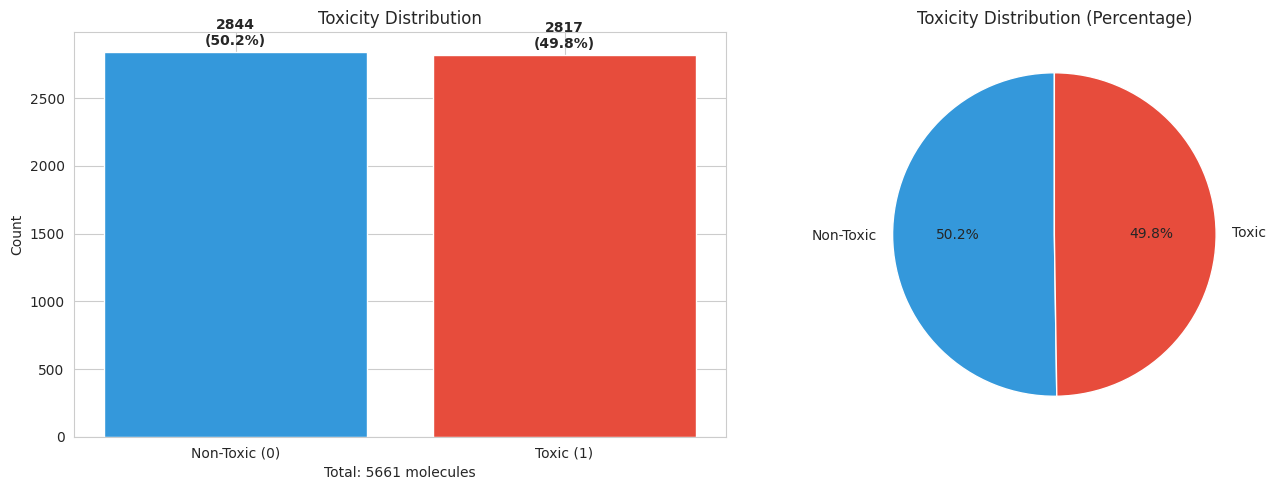

CLASS BALANCE ANALYSIS

Toxic Distribution:
toxic
0    0.502385
1    0.497615
Name: proportion, dtype: float64
Imbalance ratio: 0.48%
Status: BALANCED


In [27]:
# Step 5: Plot distribution of target variable and check balance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Toxic distribution
toxic_counts = df_labeled['toxic'].value_counts()
axes[0].bar(['Non-Toxic (0)', 'Toxic (1)'], toxic_counts.values, color=['#3498db', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Toxicity Distribution')
axes[0].set_xlabel(f'Total: {len(df_labeled)} molecules')
for i, v in enumerate(toxic_counts.values):
    axes[0].text(i, v + 50, f'{v}\n({v/len(df_labeled)*100:.1f}%)', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(toxic_counts.values, labels=['Non-Toxic', 'Toxic'], autopct='%1.1f%%', 
            colors=['#3498db', '#e74c3c'], startangle=90)
axes[1].set_title('Toxicity Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Balance Analysis
print("="*80)
print("CLASS BALANCE ANALYSIS")
print("="*80)
print("\nToxic Distribution:")
print(df_labeled['toxic'].value_counts(normalize=True))
imbalance_tox = abs(toxic_counts[0] - toxic_counts[1]) / toxic_counts.sum()
print(f"Imbalance ratio: {imbalance_tox:.2%}")
print(f"Status: {'IMBALANCED' if imbalance_tox > 0.3 else 'BALANCED'}")

CORRELATION ANALYSIS (Threshold: 0.5)

Top 10 features correlated with toxic:
LogP                      0.245163
NumRings                  0.230772
NumAromaticRings          0.229152
fr_benzene                0.222573
NumAromaticCarbocycles    0.222188
BertzCT                   0.221338
MolMR                     0.198710
LabuteASA                 0.190028
MolWt                     0.184993
Chi0v                     0.178323
Name: toxic, dtype: float64

HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5): 134 pairs found
fr_benzene                     <-> NumAromaticCarbocycles         :  0.998
Chi0v                          <-> LabuteASA                      :  0.993
LabuteASA                      <-> NumValenceElectrons            :  0.991
MolMR                          <-> LabuteASA                      :  0.989
MolMR                          <-> Chi0v                          :  0.989
Chi1v                          <-> Chi0v                          :  0.986
Chi0v                          <

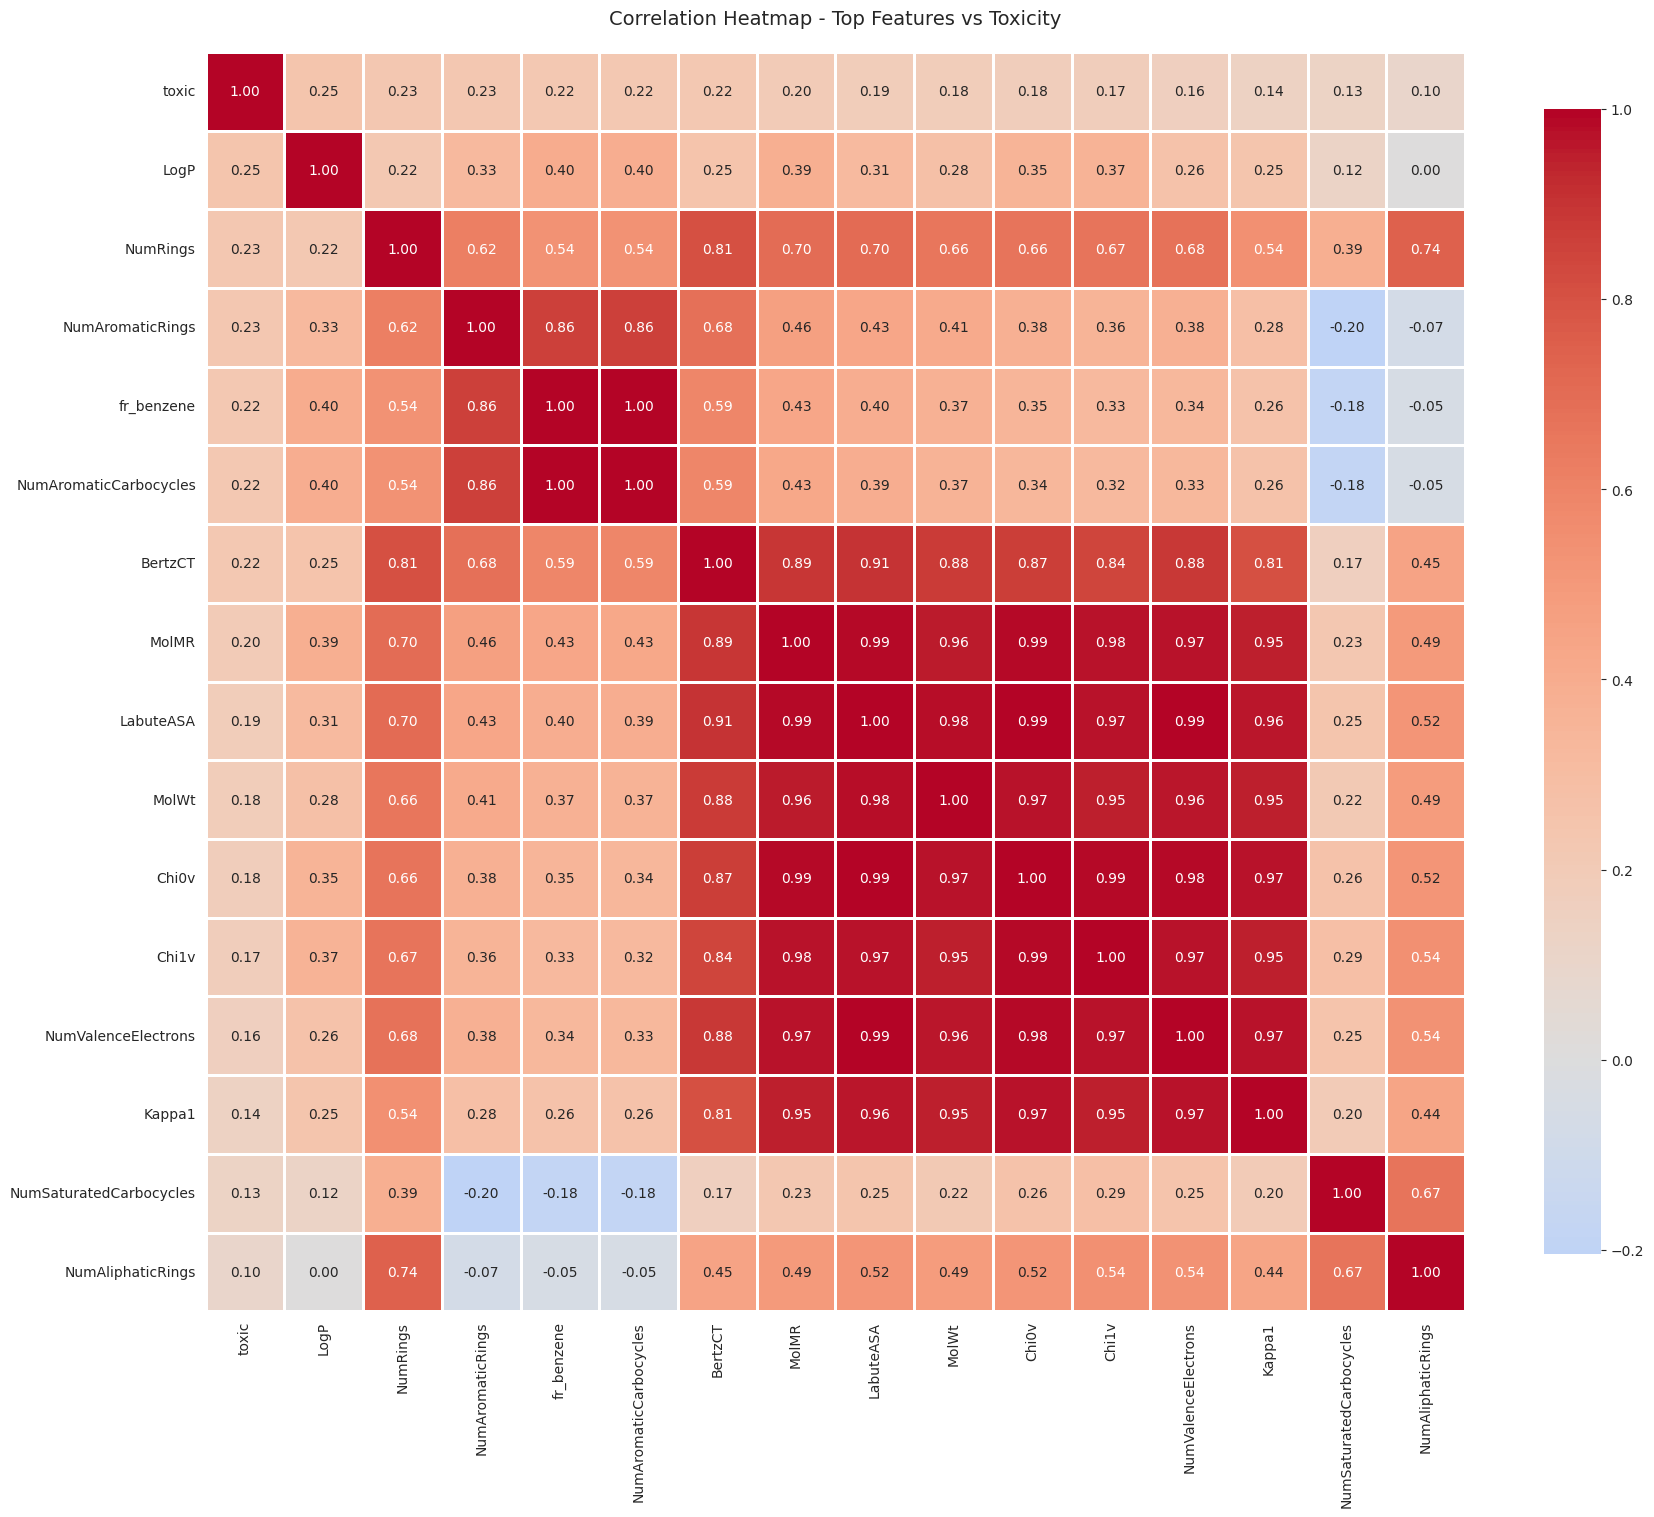

In [28]:
# Step 6: Correlation analysis
print("="*80)
print("CORRELATION ANALYSIS (Threshold: 0.5)")
print("="*80)

# Select only numeric columns
numeric_cols = df_labeled.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation with target
correlation_with_target = df_labeled[numeric_cols].corr()['toxic'].sort_values(ascending=False)

print("\nTop 10 features correlated with toxic:")
print(correlation_with_target.head(11)[1:])  # Exclude 'toxic' itself

# Find highly correlated feature pairs
corr_matrix = df_labeled[numeric_cols].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(column, row, upper_triangle.loc[row, column]) 
                   for column in upper_triangle.columns 
                   for row in upper_triangle.index 
                   if upper_triangle.loc[row, column] > 0.5]

print(f"\n{'='*80}")
print(f"HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5): {len(high_corr_pairs)} pairs found")
print("="*80)

# Display top 20 pairs
for i, (col1, col2, corr_val) in enumerate(sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)[:20]):
    print(f"{col1:30} <-> {col2:30} : {corr_val:6.3f}")

# Visualize correlation heatmap
plt.figure(figsize=(18, 16))
# Select subset of features for better visualization
feature_subset = ['toxic'] + list(correlation_with_target.head(16)[1:].index)
sns.heatmap(df_labeled[feature_subset].corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top Features vs Toxicity', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Unlabeled Data

In [29]:
# Load unlabeled data for comparison
print("="*80)
print("LOADING UNLABELED DATA")
print("="*80)

df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/tox21/unlabeled_features.csv')
print(f"✓ Unlabeled dataset loaded successfully!")
print(f"Shape: {df_unlabeled.shape}")
print(f"\nFirst few rows:")
df_unlabeled.head()

LOADING UNLABELED DATA
✓ Unlabeled dataset loaded successfully!
Shape: (249453, 40)

First few rows:


,smiles,canonical_smiles,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,NumHeteroatoms,TPSA,...,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen,FDA_APPROVED,toxic
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,325.383,5.05060,1.0,2.0,3.0,3.0,4.0,42.24,...,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,NaN,NaN
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,285.395,3.11370,1.0,5.0,3.0,2.0,5.0,55.63,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,382.463,4.96778,0.0,3.0,5.0,3.0,4.0,53.33,...,3.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,409.530,4.00022,0.0,5.0,4.0,2.0,6.0,64.43,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,413.910,3.60956,1.0,6.0,4.0,1.0,8.0,112.10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN


In [30]:
# Compare labeled vs unlabeled datasets
print("="*80)
print("LABELED vs UNLABELED DATA COMPARISON")
print("="*80)

print(f"\nLabeled data:   {df_labeled.shape[0]} molecules, {df_labeled.shape[1]} columns")
print(f"Unlabeled data: {df_unlabeled.shape[0]} molecules, {df_unlabeled.shape[1]} columns")

# Check if columns match
labeled_cols = set(df_labeled.columns)
unlabeled_cols = set(df_unlabeled.columns)

common_cols = labeled_cols & unlabeled_cols
only_labeled = labeled_cols - unlabeled_cols
only_unlabeled = unlabeled_cols - labeled_cols

print(f"\nCommon features: {len(common_cols)}")
print(f"Only in labeled: {only_labeled}")
print(f"Only in unlabeled: {only_unlabeled}")

# Check for missing values in unlabeled data
print("\n" + "="*80)
print("MISSING VALUES IN UNLABELED DATA")
print("="*80)

missing_unlabeled = df_unlabeled.isnull().sum()
missing_unlabeled_df = pd.DataFrame({
    'Missing_Count': missing_unlabeled,
    'Percentage': (missing_unlabeled / len(df_unlabeled)) * 100
})
missing_unlabeled_df = missing_unlabeled_df[missing_unlabeled_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_unlabeled_df) > 0:
    print(missing_unlabeled_df)
else:
    print("✓ No missing values in feature columns!")

LABELED vs UNLABELED DATA COMPARISON

Labeled data:   5661 molecules, 40 columns
Unlabeled data: 249453 molecules, 40 columns

Common features: 39
Only in labeled: {'mol_id'}
Only in unlabeled: {'FDA_APPROVED'}

MISSING VALUES IN UNLABELED DATA
              Missing_Count  Percentage
FDA_APPROVED         249453       100.0
toxic                249453       100.0


In [31]:
# Compare feature distributions between labeled and unlabeled data
print("="*80)
print("FEATURE DISTRIBUTION COMPARISON")
print("="*80)

# Select key molecular features for comparison
key_features = ['MolWt', 'LogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 
                'NumRotatableBonds', 'NumAromaticRings', 'QED']

# Drop SMILES columns for statistical comparison
df_labeled_features = df_labeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')
df_unlabeled_features = df_unlabeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')

print("\nSummary Statistics Comparison:")
print("\n--- LABELED DATA ---")
print(df_labeled_features[key_features].describe().T)
print("\n--- UNLABELED DATA ---")
print(df_unlabeled_features[key_features].describe().T)

FEATURE DISTRIBUTION COMPARISON

Summary Statistics Comparison:

--- LABELED DATA ---
                    count        mean         std        min         25%  \
MolWt              5661.0  283.196706  164.930128  30.026000  172.248000   
LogP               5661.0    2.505658    2.326179 -15.896720    1.259800   
TPSA               5661.0   60.543639   58.034045   0.000000   26.300000   
NumHDonors         5661.0    1.253135    1.951907   0.000000    0.000000   
NumHAcceptors      5661.0    3.642819    3.195839   0.000000    2.000000   
NumRotatableBonds  5661.0    4.298181    4.446634   0.000000    1.000000   
NumAromaticRings   5661.0    1.181417    1.122425   0.000000    0.000000   
QED                5661.0    0.546819    0.192397   0.010404    0.422306   

                          50%         75%          max  
MolWt              249.269000  350.480000  1877.664000  
LogP                 2.543220    3.803200    22.611800  
TPSA                47.580000   77.840000   777.980000  
N

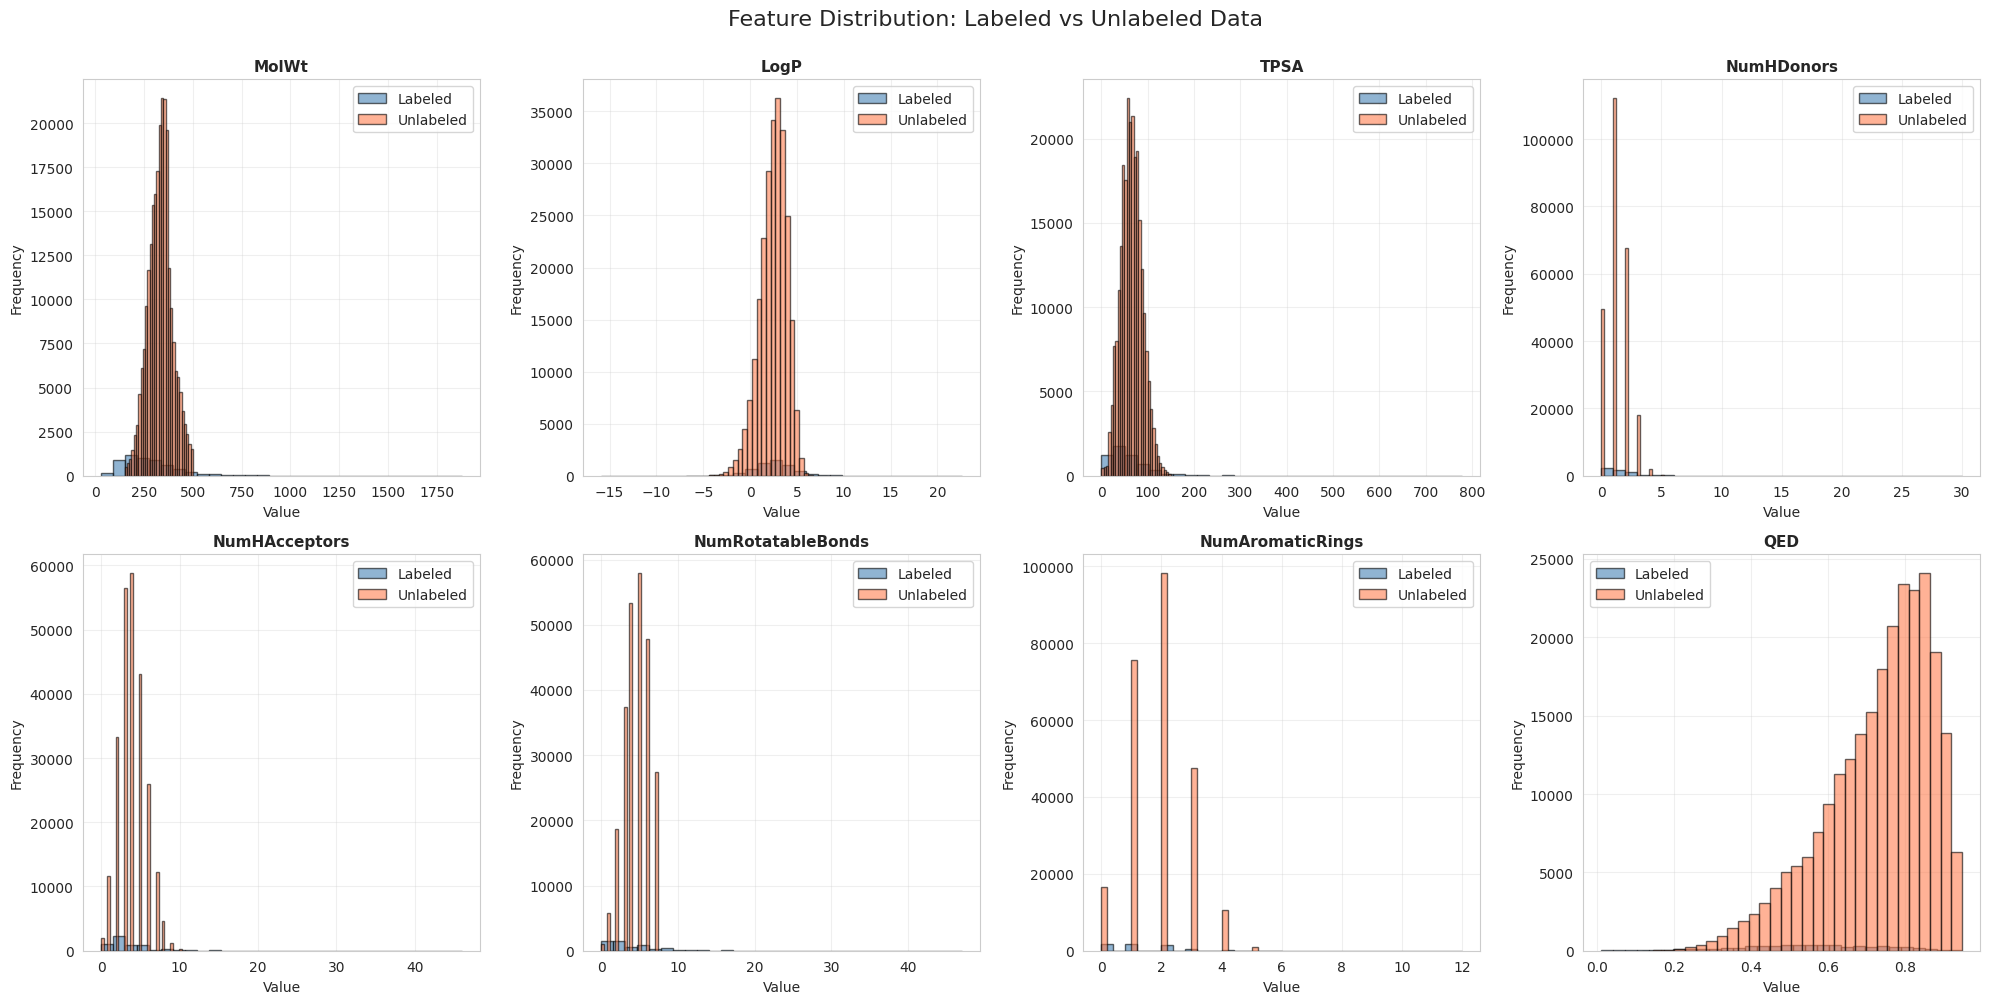

In [32]:
# Visualize distribution comparison for key features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Plot both distributions on same axis
    axes[idx].hist(df_labeled[feature], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
    axes[idx].hist(df_unlabeled[feature], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distribution: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

In [33]:
# Statistical tests to check if distributions are similar
from scipy.stats import ks_2samp

print("="*80)
print("STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)")
print("="*80)
print("Null Hypothesis: The two distributions are identical")
print("If p-value < 0.05, distributions are significantly different\n")

comparison_results = []

for feature in key_features:
    # Perform KS test
    statistic, p_value = ks_2samp(df_labeled[feature].dropna(), df_unlabeled[feature].dropna())
    
    comparison_results.append({
        'Feature': feature,
        'KS_Statistic': statistic,
        'P_Value': p_value,
        'Significant_Diff': 'YES' if p_value < 0.05 else 'NO'
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
significant_diffs = comparison_df[comparison_df['Significant_Diff'] == 'YES']
if len(significant_diffs) > 0:
    print(f"{len(significant_diffs)} features show significant distribution differences")
    print(f"Features: {', '.join(significant_diffs['Feature'].tolist())}")
    print("This may affect model generalization on unlabeled data!")
else:
    print("✓ No significant distribution differences found")
    print("Labeled and unlabeled data come from similar distributions")

STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)
Null Hypothesis: The two distributions are identical
If p-value < 0.05, distributions are significantly different

          Feature  KS_Statistic       P_Value Significant_Diff
            MolWt      0.410116  0.000000e+00              YES
             LogP      0.099025  1.065440e-47              YES
             TPSA      0.276023  0.000000e+00              YES
       NumHDonors      0.204687 8.072629e-204              YES
    NumHAcceptors      0.229434 1.329320e-256              YES
NumRotatableBonds      0.320638  0.000000e+00              YES
 NumAromaticRings      0.276017  0.000000e+00              YES
              QED      0.439198  0.000000e+00              YES

INTERPRETATION:
8 features show significant distribution differences
Features: MolWt, LogP, TPSA, NumHDonors, NumHAcceptors, NumRotatableBonds, NumAromaticRings, QED
This may affect model generalization on unlabeled data!


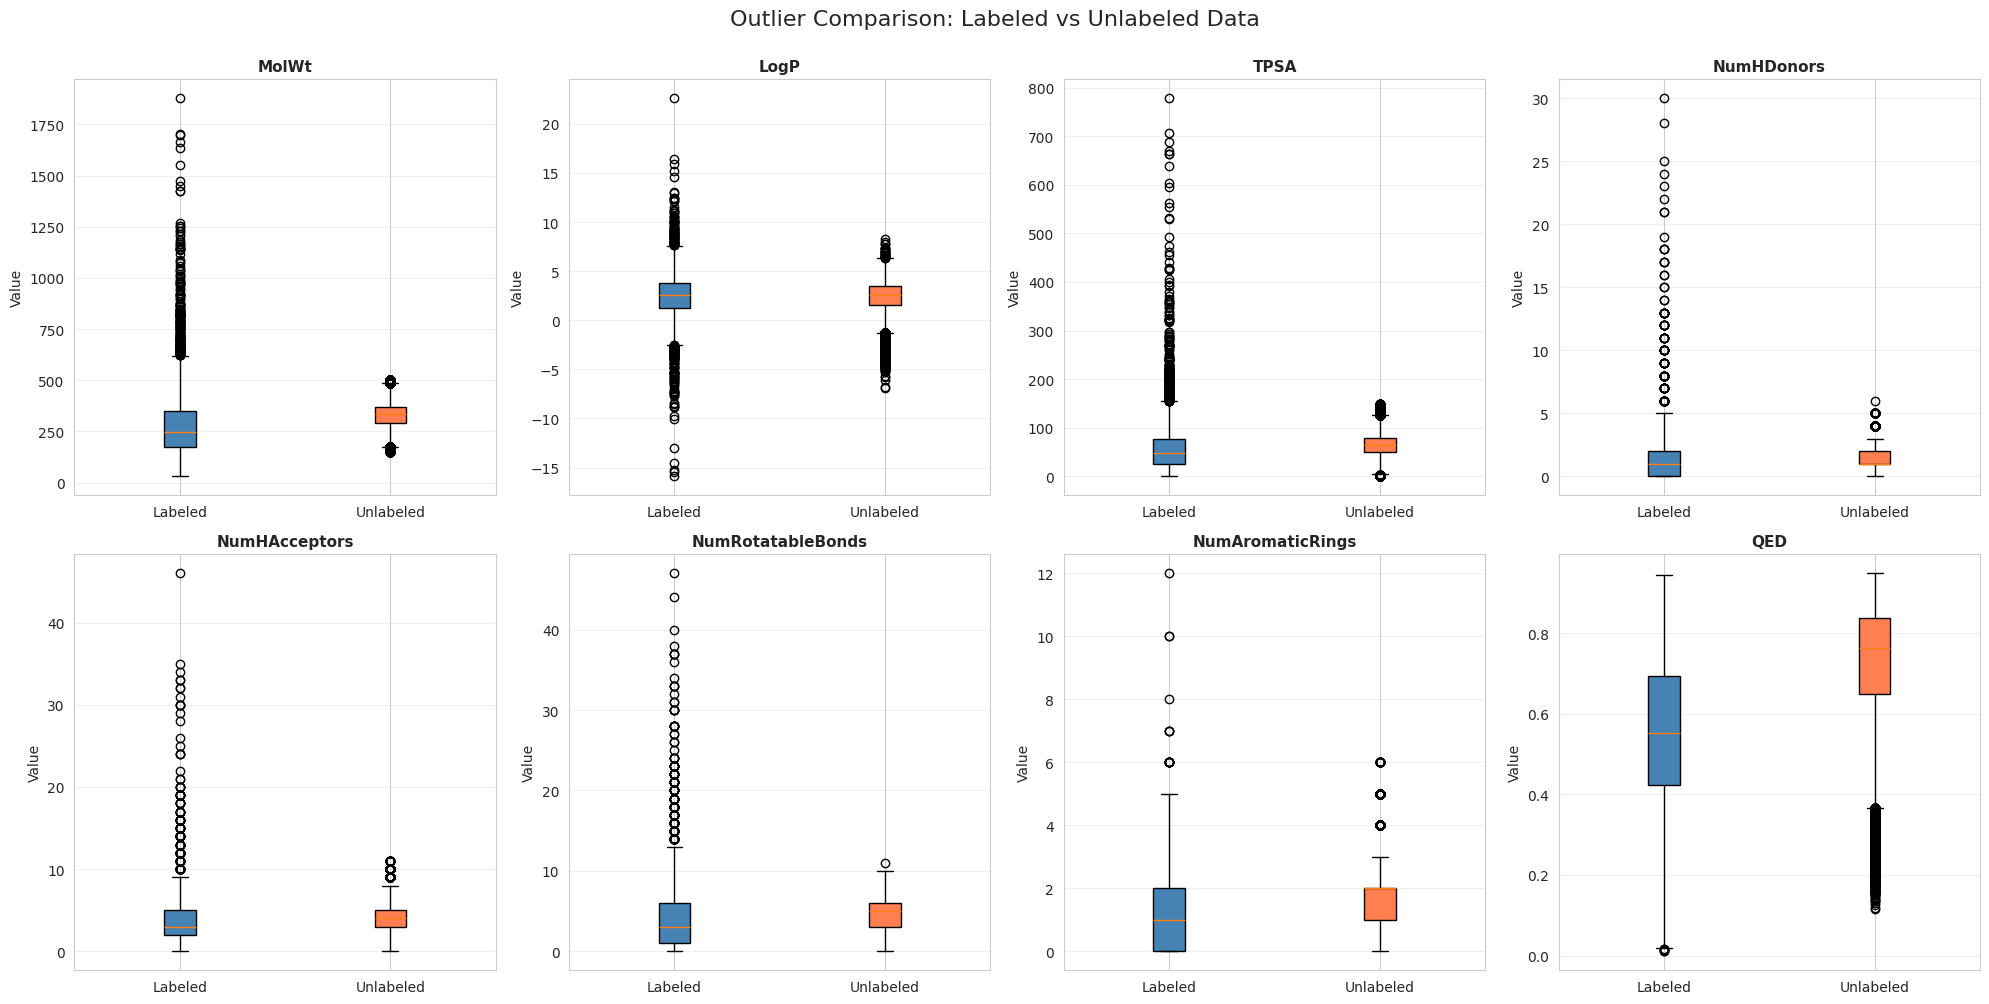

In [34]:
# Box plots for outlier comparison
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    data_to_plot = [df_labeled[feature].dropna(), df_unlabeled[feature].dropna()]
    bp = axes[idx].boxplot(data_to_plot, labels=['Labeled', 'Unlabeled'], patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('coral')
    
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Outlier Comparison: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

DRUG-LIKENESS COMPARISON

QED (Quantitative Estimate of Drug-likeness):
Labeled   - Mean: 0.547, Std: 0.192
Unlabeled - Mean: 0.732, Std: 0.139

Lipinski's Rule of Five Compliance:
Labeled:   4703/5661 (83.1%)
Unlabeled: 245429/249453 (98.4%)


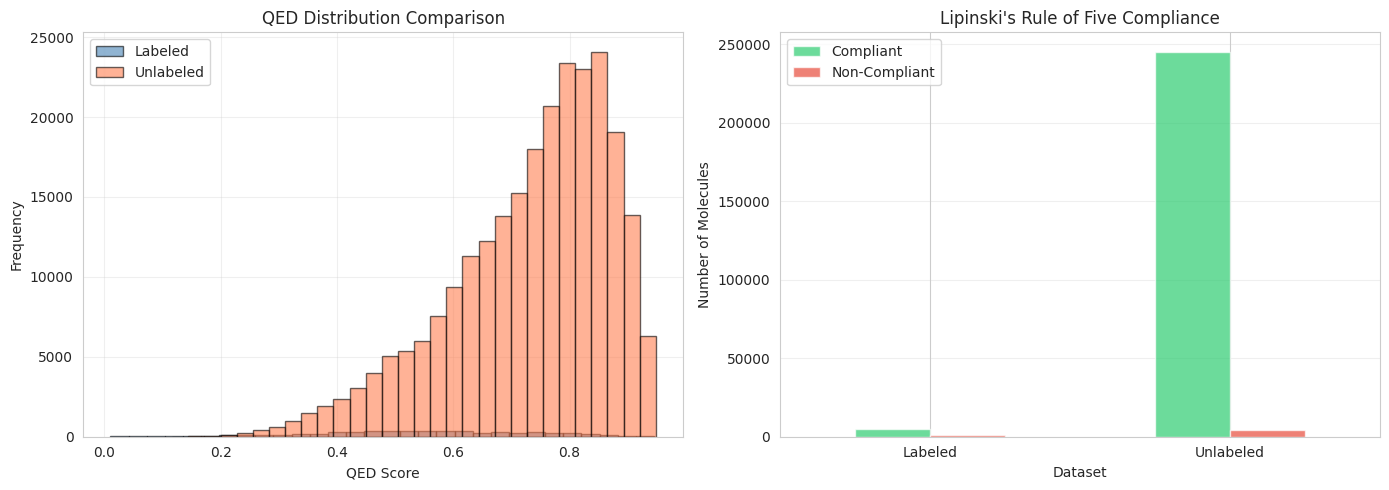

In [35]:
# Check chemical diversity using QED and other drug-likeness metrics
print("="*80)
print("DRUG-LIKENESS COMPARISON")
print("="*80)

# QED Distribution
print("\nQED (Quantitative Estimate of Drug-likeness):")
print(f"Labeled   - Mean: {df_labeled['QED'].mean():.3f}, Std: {df_labeled['QED'].std():.3f}")
print(f"Unlabeled - Mean: {df_unlabeled['QED'].mean():.3f}, Std: {df_unlabeled['QED'].std():.3f}")

# Lipinski's Rule of Five compliance
def check_lipinski(row):
    return (row['MolWt'] <= 500 and 
            row['LogP'] <= 5 and 
            row['NumHDonors'] <= 5 and 
            row['NumHAcceptors'] <= 10)

df_labeled['Lipinski_Compliant'] = df_labeled.apply(check_lipinski, axis=1)
df_unlabeled['Lipinski_Compliant'] = df_unlabeled.apply(check_lipinski, axis=1)

labeled_compliant = df_labeled['Lipinski_Compliant'].sum()
unlabeled_compliant = df_unlabeled['Lipinski_Compliant'].sum()

print(f"\nLipinski's Rule of Five Compliance:")
print(f"Labeled:   {labeled_compliant}/{len(df_labeled)} ({labeled_compliant/len(df_labeled)*100:.1f}%)")
print(f"Unlabeled: {unlabeled_compliant}/{len(df_unlabeled)} ({unlabeled_compliant/len(df_unlabeled)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# QED comparison
axes[0].hist(df_labeled['QED'], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
axes[0].hist(df_unlabeled['QED'], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
axes[0].set_xlabel('QED Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('QED Distribution Comparison')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Lipinski compliance
lipinski_data = pd.DataFrame({
    'Dataset': ['Labeled', 'Unlabeled'],
    'Compliant': [labeled_compliant, unlabeled_compliant],
    'Non-Compliant': [len(df_labeled) - labeled_compliant, len(df_unlabeled) - unlabeled_compliant]
})

lipinski_data.set_index('Dataset').plot(kind='bar', stacked=False, ax=axes[1], 
                                         color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1].set_ylabel('Number of Molecules')
axes[1].set_title("Lipinski's Rule of Five Compliance")
axes[1].set_xticklabels(['Labeled', 'Unlabeled'], rotation=0)
axes[1].legend(['Compliant', 'Non-Compliant'])
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [36]:
# Summary statistics comparison table
print("="*80)
print("COMPLETE DATASET SUMMARY")
print("="*80)

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Molecules',
        'Total Features',
        'Missing Values',
        'Mean Molecular Weight',
        'Mean LogP',
        'Mean TPSA',
        'Mean QED',
        'Lipinski Compliant (%)',
        'Mean Aromatic Rings'
    ],
    'Labeled': [
        len(df_labeled),
        len(df_labeled.columns) - 4,  # Exclude smiles, canonical_smiles, and targets
        df_labeled.isnull().sum().sum(),
        f"{df_labeled['MolWt'].mean():.2f}",
        f"{df_labeled['LogP'].mean():.2f}",
        f"{df_labeled['TPSA'].mean():.2f}",
        f"{df_labeled['QED'].mean():.3f}",
        f"{labeled_compliant/len(df_labeled)*100:.1f}%",
        f"{df_labeled['NumAromaticRings'].mean():.2f}"
    ],
    'Unlabeled': [
        len(df_unlabeled),
        len(df_unlabeled.columns) - 4,
        df_unlabeled.isnull().sum().sum(),
        f"{df_unlabeled['MolWt'].mean():.2f}",
        f"{df_unlabeled['LogP'].mean():.2f}",
        f"{df_unlabeled['TPSA'].mean():.2f}",
        f"{df_unlabeled['QED'].mean():.3f}",
        f"{unlabeled_compliant/len(df_unlabeled)*100:.1f}%",
        f"{df_unlabeled['NumAromaticRings'].mean():.2f}"
    ]
})

print(summary_stats.to_string(index=False))

print("\n✓ Unlabeled data analysis completed!")

COMPLETE DATASET SUMMARY
                Metric Labeled Unlabeled
       Total Molecules    5661    249453
        Total Features      37        37
        Missing Values       0    498906
 Mean Molecular Weight  283.20    332.14
             Mean LogP    2.51      2.46
             Mean TPSA   60.54     64.82
              Mean QED   0.547     0.732
Lipinski Compliant (%)   83.1%     98.4%
   Mean Aromatic Rings    1.18      1.85

✓ Unlabeled data analysis completed!


## Data Processing

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import json

print("="*80)
print("DATA PREPROCESSING FOR SEMI-SUPERVISED LEARNING")
print("="*80)

# Load data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/tox21/labeled_features.csv')
df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/tox21/unlabeled_features.csv')

print(f"\nLoaded {len(df_labeled)} labeled molecules")
print(f"Loaded {len(df_unlabeled)} unlabeled molecules")

DATA PREPROCESSING FOR SEMI-SUPERVISED LEARNING

Loaded 5661 labeled molecules
Loaded 249453 unlabeled molecules


In [38]:
# Step 1: Keep ALL Features
print("\n" + "="*80)
print("STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES")
print("="*80)

# Identify feature columns (exclude identifiers and targets)
exclude_cols = ['smiles', 'canonical_smiles', 'FDA_APPROVED', 'toxic','mol_id']
all_features = [col for col in df_labeled.columns if col not in exclude_cols]

print(f"Keeping all {len(all_features)} molecular features:")
for i, feat in enumerate(all_features, 1):
    print(f"  {i:2d}. {feat}")

# Apply to both datasets
X_labeled = df_labeled[all_features]
y_tox = df_labeled['toxic']

X_unlabeled = df_unlabeled[all_features]

print(f"\nLabeled data: {X_labeled.shape}")
print(f"Unlabeled data: {X_unlabeled.shape}")


STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES
Keeping all 36 molecular features:
   1. MolWt
   2. LogP
   3. NumHDonors
   4. NumHAcceptors
   5. NumRotatableBonds
   6. NumAromaticRings
   7. NumHeteroatoms
   8. TPSA
   9. NumRings
  10. NumAliphaticRings
  11. NumSaturatedRings
  12. FractionCsp3
  13. NumValenceElectrons
  14. MaxPartialCharge
  15. MinPartialCharge
  16. LabuteASA
  17. PEOE_VSA1
  18. PEOE_VSA2
  19. QED
  20. BertzCT
  21. Chi0v
  22. Chi1v
  23. Kappa1
  24. Kappa2
  25. MolMR
  26. BalabanJ
  27. HallKierAlpha
  28. NumSaturatedCarbocycles
  29. NumAromaticCarbocycles
  30. NumSaturatedHeterocycles
  31. NumAromaticHeterocycles
  32. fr_NH2
  33. fr_COO
  34. fr_benzene
  35. fr_furan
  36. fr_halogen

Labeled data: (5661, 36)
Unlabeled data: (249453, 36)


In [39]:
# Step 2: Handle outliers (CLIPPING)
print("\n" + "="*80)
print("STEP 2: HANDLE OUTLIERS (CLIPPING)")
print("="*80)

def clip_outliers(df, std_threshold=3):
    """Clip outliers using standard deviation method"""
    df_clipped = df.copy()
    outlier_count = 0
    
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - std_threshold * std
        upper_bound = mean + std_threshold * std
        
        # Count outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers > 0:
            outlier_count += outliers
            print(f"  {col:20s}: {outliers} outliers clipped")
            df_clipped[col] = df[col].clip(lower_bound, upper_bound)
    
    return df_clipped, outlier_count

X_labeled_clipped, labeled_outliers = clip_outliers(X_labeled, std_threshold=3)
X_unlabeled_clipped, unlabeled_outliers = clip_outliers(X_unlabeled, std_threshold=3)

print(f"\n✓ Total outliers clipped:")
print(f"  Labeled: {labeled_outliers}")
print(f"  Unlabeled: {unlabeled_outliers}")


STEP 2: HANDLE OUTLIERS (CLIPPING)
  MolWt               : 102 outliers clipped
  LogP                : 80 outliers clipped
  NumHDonors          : 93 outliers clipped
  NumHAcceptors       : 102 outliers clipped
  NumRotatableBonds   : 110 outliers clipped
  NumAromaticRings    : 45 outliers clipped
  NumHeteroatoms      : 75 outliers clipped
  TPSA                : 83 outliers clipped
  NumRings            : 78 outliers clipped
  NumAliphaticRings   : 101 outliers clipped
  NumSaturatedRings   : 104 outliers clipped
  NumValenceElectrons : 99 outliers clipped
  MinPartialCharge    : 14 outliers clipped
  LabuteASA           : 97 outliers clipped
  PEOE_VSA1           : 115 outliers clipped
  PEOE_VSA2           : 70 outliers clipped
  BertzCT             : 76 outliers clipped
  Chi0v               : 103 outliers clipped
  Chi1v               : 101 outliers clipped
  Kappa1              : 100 outliers clipped
  Kappa2              : 1 outliers clipped
  MolMR               : 97 outli

In [43]:
print("\n" + "="*80)
print("STEP 3: Z-SCORE NORMALIZATION")
print("="*80)

# 1. Handle non-finite values (inf, -inf, NaN) by dropping the entire row
print("Checking for non-finite values (inf or nan)...")

# Create a boolean mask: True if ANY value in the row is NOT finite
labeled_non_finite_mask = ~np.isfinite(X_labeled_clipped).all(axis=1)
unlabeled_non_finite_mask = ~np.isfinite(X_unlabeled_clipped).all(axis=1)

# Drop rows with non-finite values
X_labeled_clipped_clean = X_labeled_clipped[~labeled_non_finite_mask].copy()
X_unlabeled_clipped_clean = X_unlabeled_clipped[~unlabeled_non_finite_mask].copy()

# CRITICAL: Align the target variable y_tox by dropping corresponding rows
y_tox_clean = y_tox[~labeled_non_finite_mask].copy()

removed_labeled = labeled_non_finite_mask.sum()
removed_unlabeled = unlabeled_non_finite_mask.sum()

print(f"Removed {removed_labeled} labeled rows due to non-finite features (inf or nan).")
print(f"Removed {removed_unlabeled} unlabeled rows due to non-finite features (inf or nan).")
print(f"\nLabeled data shape after cleanup: {X_labeled_clipped_clean.shape}")
print(f"Target data shape after cleanup: {y_tox_clean.shape}")


# Verify no extreme values remain
print(f"\nLabeled data range: [{X_labeled_clipped_clean.min().min():.2f}, {X_labeled_clipped_clean.max().max():.2f}]")
print(f"Unlabeled data range: [{X_unlabeled_clipped_clean.min().min():.2f}, {X_unlabeled_clipped_clean.max().max():.2f}]")

# Now fit scaler on labeled data only
scaler = StandardScaler()
scaler.fit(X_labeled_clipped_clean)

# Transform both datasets
X_labeled_scaled = scaler.transform(X_labeled_clipped_clean)
X_unlabeled_scaled = scaler.transform(X_unlabeled_clipped_clean)

# Convert back to DataFrame
X_labeled_scaled_df = pd.DataFrame(
    X_labeled_scaled, 
    columns=X_labeled_clipped_clean.columns,
    index=X_labeled_clipped_clean.index
)

X_unlabeled_scaled_df = pd.DataFrame(
    X_unlabeled_scaled, 
    columns=X_unlabeled_clipped_clean.columns,
    index=X_unlabeled_clipped_clean.index
)

print(f"\n✓ Normalization completed")
print(f"\nScaled labeled data shape: {X_labeled_scaled_df.shape}")
print(f"Scaled unlabeled data shape: {X_unlabeled_scaled_df.shape}")


STEP 3: Z-SCORE NORMALIZATION
Checking for non-finite values (inf or nan)...
Removed 1 labeled rows due to non-finite features (inf or nan).
Removed 0 unlabeled rows due to non-finite features (inf or nan).

Labeled data shape after cleanup: (5660, 36)
Target data shape after cleanup: (5660,)

Labeled data range: [-5.25, 1837.24]
Unlabeled data range: [-4.72, 1483.04]

✓ Normalization completed

Scaled labeled data shape: (5660, 36)
Scaled unlabeled data shape: (249453, 36)


In [46]:
# Step 4: Add target back to labeled data
print("\n" + "="*80)
print("STEP 4: COMBINE FEATURES WITH TARGET")
print("="*80)

# Add CT_TOX target only
df_labeled_processed = X_labeled_scaled_df.copy()

# FIX: Use the cleaned and aligned target variable (y_tox_clean) instead of the original (y_tox)
df_labeled_processed['toxic'] = y_tox_clean.values

df_unlabeled_processed = X_unlabeled_scaled_df.copy()
df_unlabeled_processed['toxic'] = np.nan

print(f"Labeled processed: {df_labeled_processed.shape}")
print(f"Unlabeled processed: {df_unlabeled_processed.shape}")

# Display sample
print("\nSample of processed labeled data:")
print(df_labeled_processed.head())


STEP 4: COMBINE FEATURES WITH TARGET
Labeled processed: (5660, 37)
Unlabeled processed: (249453, 37)

Sample of processed labeled data:
      MolWt      LogP  NumHDonors  NumHAcceptors  NumRotatableBonds  \
0 -0.570267  0.115423   -0.807384      -0.577494          -0.811854   
1  0.633387  0.499055   -0.807384       0.542215          -1.066718   
2  0.927607  0.169883   -0.807384       1.661924          -0.047260   
3  0.300212  0.980668   -0.807384      -0.204258          -0.556989   
4 -0.805485 -0.735731   -0.119900      -0.577494          -0.811854   

   NumAromaticRings  NumHeteroatoms      TPSA  NumRings  NumAliphaticRings  \
0         -1.087411       -0.849322 -0.694093  0.081389           1.145146   
1         -1.087411        1.460351 -0.267216 -0.560286           0.275341   
2          0.769031        0.882933  0.368046  2.006415           2.014952   
3          0.769031       -0.560613 -1.120325  2.648090           2.884758   
4         -0.159190       -0.560613 -0.564202 

In [47]:
# Step 5: Save processed data
print("\n" + "="*80)
print("STEP 5: SAVE PROCESSED DATA")
print("="*80)

# Save processed datasets
df_labeled_processed.to_csv('../../data/processed/tox21/labeled_processed.csv', index=False)
df_unlabeled_processed.to_csv('../../data/processed/tox21/unlabeled_processed.csv', index=False)

# Save scaler for later use
joblib.dump(scaler, '../../data/processed/tox21/scaler.pkl')

# Save feature information
feature_info = {
    'feature_names': all_features,
    'n_features': len(all_features),
    'target_variable': 'CT_TOX',
    'selection_method': 'all_features_included',
    'scaling_method': 'StandardScaler',
    'outlier_handling': 'clipping_3std',
    'feature_categories': {
        'basic_properties': ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings'],
        'lipinski': ['NumHeteroatoms', 'TPSA'],
        'structural': ['NumRings', 'NumAliphaticRings', 'NumSaturatedRings', 'FractionCsp3'],
        'topological': ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha'],
        'electronic': ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge'],
        'surface': ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2'],
        'druglikeness': ['QED', 'MolMR'],
        'pharmacophore': ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen']
    }
}

with open('../../data/processed/tox21/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)

print("✓ Saved: labeled_processed.csv")
print("✓ Saved: unlabeled_processed.csv")
print("✓ Saved: scaler.pkl")
print("✓ Saved: feature_info.json")

print("\n" + "="*80)
print("DATA PREPROCESSING COMPLETED!")
print("="*80)
print(f"\nFinal dataset ready for semi-supervised learning:")
print(f"  • {len(df_labeled_processed)} labeled molecules")
print(f"  • {len(df_unlabeled_processed)} unlabeled molecules")
print(f"  • {len(all_features)} molecular features (ALL features included)")
print(f"  • 1 target variable: Toxic")
print(f"\nFiles saved to: data/processed/tox21/")
print(f"\nNext step: Train semi-supervised models for toxicity prediction!")


STEP 5: SAVE PROCESSED DATA
✓ Saved: labeled_processed.csv
✓ Saved: unlabeled_processed.csv
✓ Saved: scaler.pkl
✓ Saved: feature_info.json

DATA PREPROCESSING COMPLETED!

Final dataset ready for semi-supervised learning:
  • 5660 labeled molecules
  • 249453 unlabeled molecules
  • 36 molecular features (ALL features included)
  • 1 target variable: Toxic

Files saved to: data/processed/tox21/

Next step: Train semi-supervised models for toxicity prediction!
